Questions:
1.	[30 marks] This Assignment requires you to write a Python program that loads the Iris dataset from the first assignment and apply EM with a Gaussian mixture model on the IRIS data. You are not allowed to use any Python library for the EM algorithm itsef, but you are of course allowed to use other helper functions. You might compare the results of your program with sklearn models, but the whole exercise is to write the algorithm yourself. 
1.1.	[30 marks, 15 marks for Grads] Write a program to implement EM with a Gaussian mixture model on the Iris dataset for k=3 and plot the Sepal data points with a color coding based on the obtained clusters.  More specifically, you can plot the data points with color where the RGB colour values correspond to the probability estimates of a data point belonging to each class.
Hint: You can use numpy.linalg.pinv to find the inverse of a matrix. Also, numpy.copy  can be used to temporary save a vector. 
1.2.	Graduate students only [15 marks] Evaluate the prediction quality with different number of assumed classes (k=2,3,4). Explain briefly your evaluation method and discuss your finding.

2.	[20 marks, 10 marks for Grads] This Assignment requires you to write a Python script to calculate some inference of a simplified version of the car repair example from the manuscript. Given are the following probabilities: 
The marginal probability that the alternator is broken is 1/1000 and the marginal probability that the fan belt is broken is 2/100. The probability that the battery is charging when either the alternator or the fan belt is broken is zero. However, even if both are working there is a 5/1000 probability that the battery is not charging. When the battery is not charging then there is a 90% chance that the battery is flat, though even if the battery is charging then there is a 10% chance that the battery is flat. Finally, the car does not start if either the battery is flat, or there is no gas, or the starter is broken. However. Even if these three conditions don’t hold there is a 5% chance that the car won’t start. 
2.1.	Draw the causal model of this system.
2.2.	What is the probability that the alternator is broken given that the car won’t start?
2.3.	What is the probability that the fan belt is broken given that the car won’t start?
2.4.	What is the probability that the fan belt is broken given that the car won’t start and the alternator is broken?
2.5.	What is the probability that the alternator and the fan belt is broken given that the car won’t start?
Hint: You might use Lea methods.
3.	Grads, only [20 marks] Naïve Bayes:
This Assignment requires you to write a Python program to test a simple binominal version of the Naïve Bayes algorithm on the 20newsgroups dataset. You need to read the data and work with sparse data in python. You should write a Naïve Bayes program on your own (not using library function) to implement the binomial version of the Naïve Bayes rule outlined in the manuscript. Please provide the results in form of a confusion matrix.


# Question1

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: overflow encountered in exp
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:124: RuntimeWarning: invalid value encountered in multiply


loglikelihood:  [-47.044989212281756, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, -68.33770418060723, inf, inf, inf, -68.33770418060723, inf, inf, inf, inf, -70.73770418060724, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, -56.33770418060723, -55.537704180607236, -53.53770418060723, inf, inf, inf, -55.93770418060723, inf, inf, inf, inf, inf, inf, inf, inf, -55.33770418060723, inf, inf, inf, inf, -46.9500985354706, inf, inf, inf, inf, -53.337704180607226, inf, -51.33770418060723, inf, inf, inf, inf, inf, inf, inf, inf, -53.937704180607234, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, -49.13770418060723, inf, -47.73770418060723, -46.937704180607234, inf, -44.73770418060723, inf, inf, -54.33770418060723, inf, -50.33770418060723, inf, inf, -53.937704180607234, inf, inf, inf, inf, -53.537704180607236, inf, -43.13770418060723, inf, -53.53770418060723, -50.937

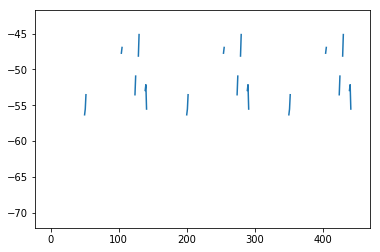

In [8]:
import numpy as np
import math as math
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from scipy import linalg
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

#fetch data
iris_data = np.loadtxt('C:\\Users\\aksha\\PycharmProjects\\FirstProject\\venv\\IRIS_data\\iris.data', delimiter=',')
#print('iris_data shape: ', iris_data.shape)


#ready the train and test sets
train_x = iris_data[:, 0:4]
train_y = np.array(iris_data[:, 4])
test_x = iris_data[0::2, 0:4]
test_y = np.array(iris_data[0::2, 4])

#define the variables to be used
k=3
sigma=[]
mu=[]
our_matrice=[]
our_mu=[]

covariance=[]
inverse=[]
determinant=[]
pi_val = [0.4,0.3,0.3]


####Definig the functions for MU and sigma and multivariate function###########################################


def multivariate_func(train_x=[],mu=[],sigma=[],pi_val=[],i=[]): #addded pi
    difference=np.subtract(train_x,np.matrix(mu[i]))
    #print(difference.shape)
    mul_ans=np.dot(inverse[i],difference[i].T)
    inter_ans= -(1/2)*(np.matmul(difference,mul_ans))
    #print(inter_ans.shape)
    final_ans=np.exp(np.float64(inter_ans))
    #print(final_ans)
    # constant part of stuff is...
    part1=np.float64(math.pow(math.sqrt(2*3.14),k)) #replace k instead of the '2'.
    part2= np.float64(part1 * math.sqrt(abs(determinant[i])))
    part3= final_ans*part2
    part4 = part3*np.float64(pi_val)
    return part4;

def mu_func(train_x=[]):
    #mu = train_x[np.random.randint(0,len(train_x))]
    mu=train_x[70]
    return mu;

def sigma_func(train_x=[],mu=[],k=[]):
    sigma=0
    for j in range(0, len(train_x)):
        #sigma=[[99.5, 99.6, 99.7, 99.55],[99.8, 99.64, 99.6, 99.8],[99.9, 99.6, 99.8, 99.8],[99, 99.8, 99.8, 99.21]]
        #sigma=np.matrix(sigma)
        #sigma = (1/k)*(np.matmul(np.matrix((train_x[j] - mu)).T,np.matrix(train_x[j] - mu)))
        sigma = sigma + (np.matmul(np.matrix((train_x[j] - mu)).T, np.matrix(train_x[j] - mu)))
        return sigma;


#############################################################


#### k-clusters function/ Estimation function ?? #########################
def estimation_func(k):
    probability = []
    for i in range(k):

        mu.append(np.matrix(mu_func(train_x)))
        sigma.append(np.matrix(sigma_func(train_x,mu,k)))
        #print(np.matrix(sigma_func(train_x,mu,k)))
        c=np.cov(np.matrix(sigma_func(train_x,mu,k)))
        #print("covarience",c)
        inverse.append(np.linalg.inv(c))
        determinant.append(abs(np.linalg.det(c)))
        probability.append(np.matrix(multivariate_func(train_x, mu, sigma, pi_val[i], i)))
        #print(pi_val[3])
        #print("inverse: ",inverse)
        #print("determinant: ", determinant)
        #covarience.append(list(c))
    prob_sum=sum(probability)
    return prob_sum;




####Maximisation function#############################
def maximisation_func(k):

    for i in range(k):
        gamma.append(np.matrix(estimation_func(k)))
        n_k.append(n_k_func(gamma[i]))
        new_mu.append(np.matrix(new_mu_func(n_k[i],gamma[i],train_x)))
        new_pi.append(np.matrix(new_pi_func(n_k[i],train_x)))
        new_sigma.append(np.matrix(new_sigma_func(train_x, new_mu[i], gamma[i], n_k[i])))
    return gamma,new_sigma,new_mu,new_pi,n_k


def new_sigma_func(train_x=[],new_mu=[],gamma=[],n_k=[]):
    for j in range(0, len(train_x)):
        #sigma=[[1.5, 4.6, 0.7, 0.55],[0.8, 0.64, 0.6, 0.8],[0.9, 0.6, 0.8, 0.8],[0, 0.8, 0.8, 0.21]]
        #sigma=np.matrix(sigma)
        #part1 = np.matmul(np.matrix((train_x[0] - new_mu)).T,np.matrix(train_x[0] - new_mu))
        #part2 = np.matmul(gamma[0],part1)
        #new_sigma = np.matmul((1/n_k),part2)
        part1= (np.matmul(np.matrix((train_x[0] - new_mu)).T, np.matrix(train_x[0] - new_mu)))
        part2=1/n_k
        new_sigma = part2 * part1 ##using the old sigma code
        return new_sigma;

def new_mu_func(n_k=[],gamma=[],train_x=[]):
    new_mu = (1 / n_k) * (sum(np.matmul(gamma.T, train_x)))
    return new_mu;

def new_pi_func(n_k=[],train_x=[]):
    new_pi = n_k / len(train_x)
    return new_pi;

def n_k_func(gamma=[]):
    n_k = gamma.sum()
    return n_k;




for i in range(5): #gives error when running with more than 5 iterations..
    gamma = []
    new_sigma = []
    new_mu = []
    new_pi = []
    n_k = []
    gamma, new_sigma, new_mu, new_pi, n_k = maximisation_func(k)

logclass1=[]
logclass2=[]
logclass3=[]

for i in range(len(gamma[0])):
    logclass1.append(math.log(gamma[0][i]))
for i in range(len(gamma[1])):
    logclass1.append(math.log(gamma[1][i]))
for i in range(len(gamma[2])):
    logclass1.append(math.log(gamma[2][i]))

log_sum=(logclass1+logclass2+logclass3)
print("loglikelihood: ",log_sum)
plt.plot(log_sum)
plt.show()


# 1.b

The pfd is coming infinite , and that is why loglikelihood is coming infinite. If that would not have been the case then i would have used the loglikehood to predict the quality of cluster.
If the classes are more than 3, then overlapping between the classes would have a higher chance to occurtake place. Over-lapping takes place in almost evey case after k=3, but when k=3, it gives us the most average case for probabilities. aand that is why k=3 would give us most accurate prediction.

In [9]:
k=4
pi_val = [0.2,0.3,0.3,0.2]
for i in range(500):
    #some statements about stuff
    gamma = []
    new_sigma = []
    new_mu = []
    new_pi = []
    n_k = []
    gamma, new_sigma, new_mu, new_pi, n_k = maximisation_func(k)

for i in range(len(n_k)):
    print("Class ",i+1," probability: ", n_k[i])
    
logclass1=[]
logclass2=[]
logclass3=[]
logclass4=[]

for i in range(len(gamma[0])):
    logclass1.append(math.log(gamma[0][i]))
for i in range(len(gamma[1])):
    logclass1.append(math.log(gamma[1][i]))
for i in range(len(gamma[2])):
    logclass1.append(math.log(gamma[2][i]))
for i in range(len(gamma[3])):
    logclass1.append(math.log(gamma[3][i]))

log_sum=(logclass1+logclass2+logclass3+logclass4)
print("loglikelihood: ",log_sum)
plt.plot(log_sum)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: overflow encountered in exp
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:124: RuntimeWarning: invalid value encountered in multiply


LinAlgError: Singular matrix

In [6]:
k=2
pi_val = [0.4,0.6]
for i in range(500):
    #some statements about stuff
    gamma = []
    new_sigma = []
    new_mu = []
    new_pi = []
    n_k = []
    gamma, new_sigma, new_mu, new_pi, n_k = maximisation_func(k)

for i in range(len(n_k)):
    print("Class ",i+1," probability: ", n_k[i])
    
logclass1=[]
logclass2=[]


for i in range(len(gamma[0])):
    logclass1.append(math.log(gamma[0][i]))
for i in range(len(gamma[1])):
    logclass1.append(math.log(gamma[1][i]))


log_sum=(logclass1+logclass2)
print("loglikelihood: ",log_sum)
plt.plot(log_sum)
plt.show()


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: overflow encountered in exp
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:124: RuntimeWarning: invalid value encountered in multiply


LinAlgError: Singular matrix

# Question2

In [12]:
# question 2

from lea import *

aleanator_broken = Lea.boolProb(1,1000)
fanbelt_broken = Lea.boolProb(2,100)

charging = Lea.buildCPT(
    (aleanator_broken & fanbelt_broken, Lea.boolProb(0)),
    (aleanator_broken & ~fanbelt_broken, Lea.boolProb(0)),
    (~aleanator_broken & fanbelt_broken, Lea.boolProb(0)),
    (~aleanator_broken & ~fanbelt_broken,Lea.boolProb(995,1000)))

battery_flat=Lea.buildCPT(
    (charging, Lea.boolProb(1/10)),
    (~charging, Lea.boolProb(9/10)))

gas = Lea.boolProb(1,1)
starter = Lea.boolProb(1,1)

car= Lea.buildCPT(
    (battery_flat  &  gas &  starter, Lea.boolProb(0)),
    (battery_flat  &  gas & ~starter, Lea.boolProb(0)),
    (battery_flat  & ~gas &  starter, Lea.boolProb(0)),
    (battery_flat  & ~gas & ~starter, Lea.boolProb(0)),
    (~battery_flat &  gas &  starter, Lea.boolProb(95,100)),
    (~battery_flat &  gas & ~starter, Lea.boolProb(0)),
    (~battery_flat & ~gas &  starter, Lea.boolProb(0)),
    (~battery_flat & ~gas & ~starter, Lea.boolProb(0)))

print(Pf(car))
#2.2.	What is the probability that the alternator is broken given that the car won’t start?
print('#2.2')
#print(aleanator_broken.given(~car))
print(Pf(aleanator_broken.given(~car)))

#2.3.	What is the probability that the fan belt is broken given that the car won’t start?
print('#2.3')
#print(fanbelt_broken.given(car))
print(Pf(fanbelt_broken.given(car)))

#2.4.	What is the probability that the fan belt is broken given that the car won’t start and the alternator is broken?
print('#2.4')
print(Pf(fanbelt_broken.given(~car & aleanator_broken)))

#2.5.	What is the probability that the alternator and the fan belt is broken given that the car won’t start?
print('#2.5')
print(Pf((aleanator_broken & fanbelt_broken).given(~car)))



0.835334924
#2.2
0.005496004507962574
#2.3
0.0022745367701159343
#2.4
0.02
#2.5
0.0001099200901592515


# Question3

In [16]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import nltk
import string
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer

cats = ['alt.atheism', 'sci.space']

#fetching train data
newsgroups_train = fetch_20newsgroups(subset='train',
                                        remove=('headers', 'footers', 'quotes'),
                                        categories=cats)
#print(newsgroups_train)
list(newsgroups_train.target_names)
newsgroups_train.filenames.shape
newsgroups_train.target.shape
#print(newsgroups_train.filenames)
#print(newsgroups_train.target)
al=newsgroups_train.data
#fetching test data
newsgroups_test = fetch_20newsgroups(subset='test',
                                        remove=('headers', 'footers', 'quotes'),
                                        categories=cats)
list(newsgroups_test.target_names)
newsgroups_test.filenames.shape
newsgroups_test.target.shape


#####pre-processing data################################################
ps = PorterStemmer()
stop_words = set(stopwords.words("english"))
pre_final_text=[]
final_text=[]
    #processing data
for x in range(len(newsgroups_train.data)):
    data_final= word_tokenize(newsgroups_train.data[x])
    data_final = filter(lambda x: x not in string.punctuation, data_final)
    processed_text = filter(lambda x: x not in stop_words,data_final)
    pre_final_text.append(processed_text)
    
for x in range(len(pre_final_text)):
    for w in pre_final_text[x]:
        final_text.append(ps.stem(w))
print(len(final_text))
print(final_text)


vec = DictVectorizer()
vec.fit_transform(final_text).toarray()


vec.get_feature_names()

137472
['pleas', 'enlighten', 'how', 'omnipot', 'contradictori', 'By', 'definit', 'occur', 'univers', 'govern', 'rule', 'natur', 'thu', 'god', 'break', 'anyth', 'god', 'must', 'allow', 'rule', 'somewher', 'therefor', 'omnipot', 'can', 'not', 'exist', 'It', 'contradict', 'rule', 'natur', 'obvious', 'omnipot', 'god', 'chang', 'rule', 'when', 'say', '``', 'By', 'definit', "''", 'exactli', 'defin', 'certainli', 'omnipot', 'you', 'seem', 'say', '``', 'rule', 'natur', "''", 'pre-exist', 'somehow', 'defin', 'natur', 'actual', 'caus', 'If', "'s", 'mean', 'I', "'d", 'like', 'hear', 'thought', 'question', 'In', '19apr199320262420', 'kelvin.jpl.nasa.gov', 'baalk', 'kelvin.jpl.nasa.gov', 'sorri', 'I', 'think', 'I', 'miss', 'bit', 'info', 'transit', 'experi', 'what', 'will', 'mean', 'loss', 'data', 'magellan', 'transmit', 'data', 'later', 'btw', 'when', 'nasa', 'cut', 'connect', 'magellan', 'not', 'I', 'look', 'forward', 'day', 'I', 'curiou', 'I', 'believ', 'someth', 'fund', 'gover', 'rather', '_no